In [6]:
#!pip install tensorflow

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [8]:

print(tf.__version__)


# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.13.0


In [11]:
df_raw=pd.read_csv('colordepth.csv'
            #, names=column_names,
                          ,na_values='?', comment='\t'
                          #,sep=' '
            , skipinitialspace=True)

In [12]:
df_raw.head()

Unnamed: 0       lon        lat   DEPTH   r   g   b    color
0           0 -9.268750  53.154297 -14.005  20  39  43  1320747
1           1 -9.268099  53.154297 -13.280  20  40  41  1321001
2           2 -9.268099  53.154948 -15.095  19  39  40  1255208
3           3 -9.267448  53.154297 -12.930  20  40  41  1321001
4           4 -9.267448  53.154948 -15.155  19  39  40  1255208

In [13]:
df=df_raw.copy()
df=df.drop('Unnamed: 0', axis=1)
df.head()

lon        lat   DEPTH   r   g   b    color
0 -9.268750  53.154297 -14.005  20  39  43  1320747
1 -9.268099  53.154297 -13.280  20  40  41  1321001
2 -9.268099  53.154948 -15.095  19  39  40  1255208
3 -9.267448  53.154297 -12.930  20  40  41  1321001
4 -9.267448  53.154948 -15.155  19  39  40  1255208

In [16]:
df_view = df.sample(frac=0.01, random_state=0)
df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

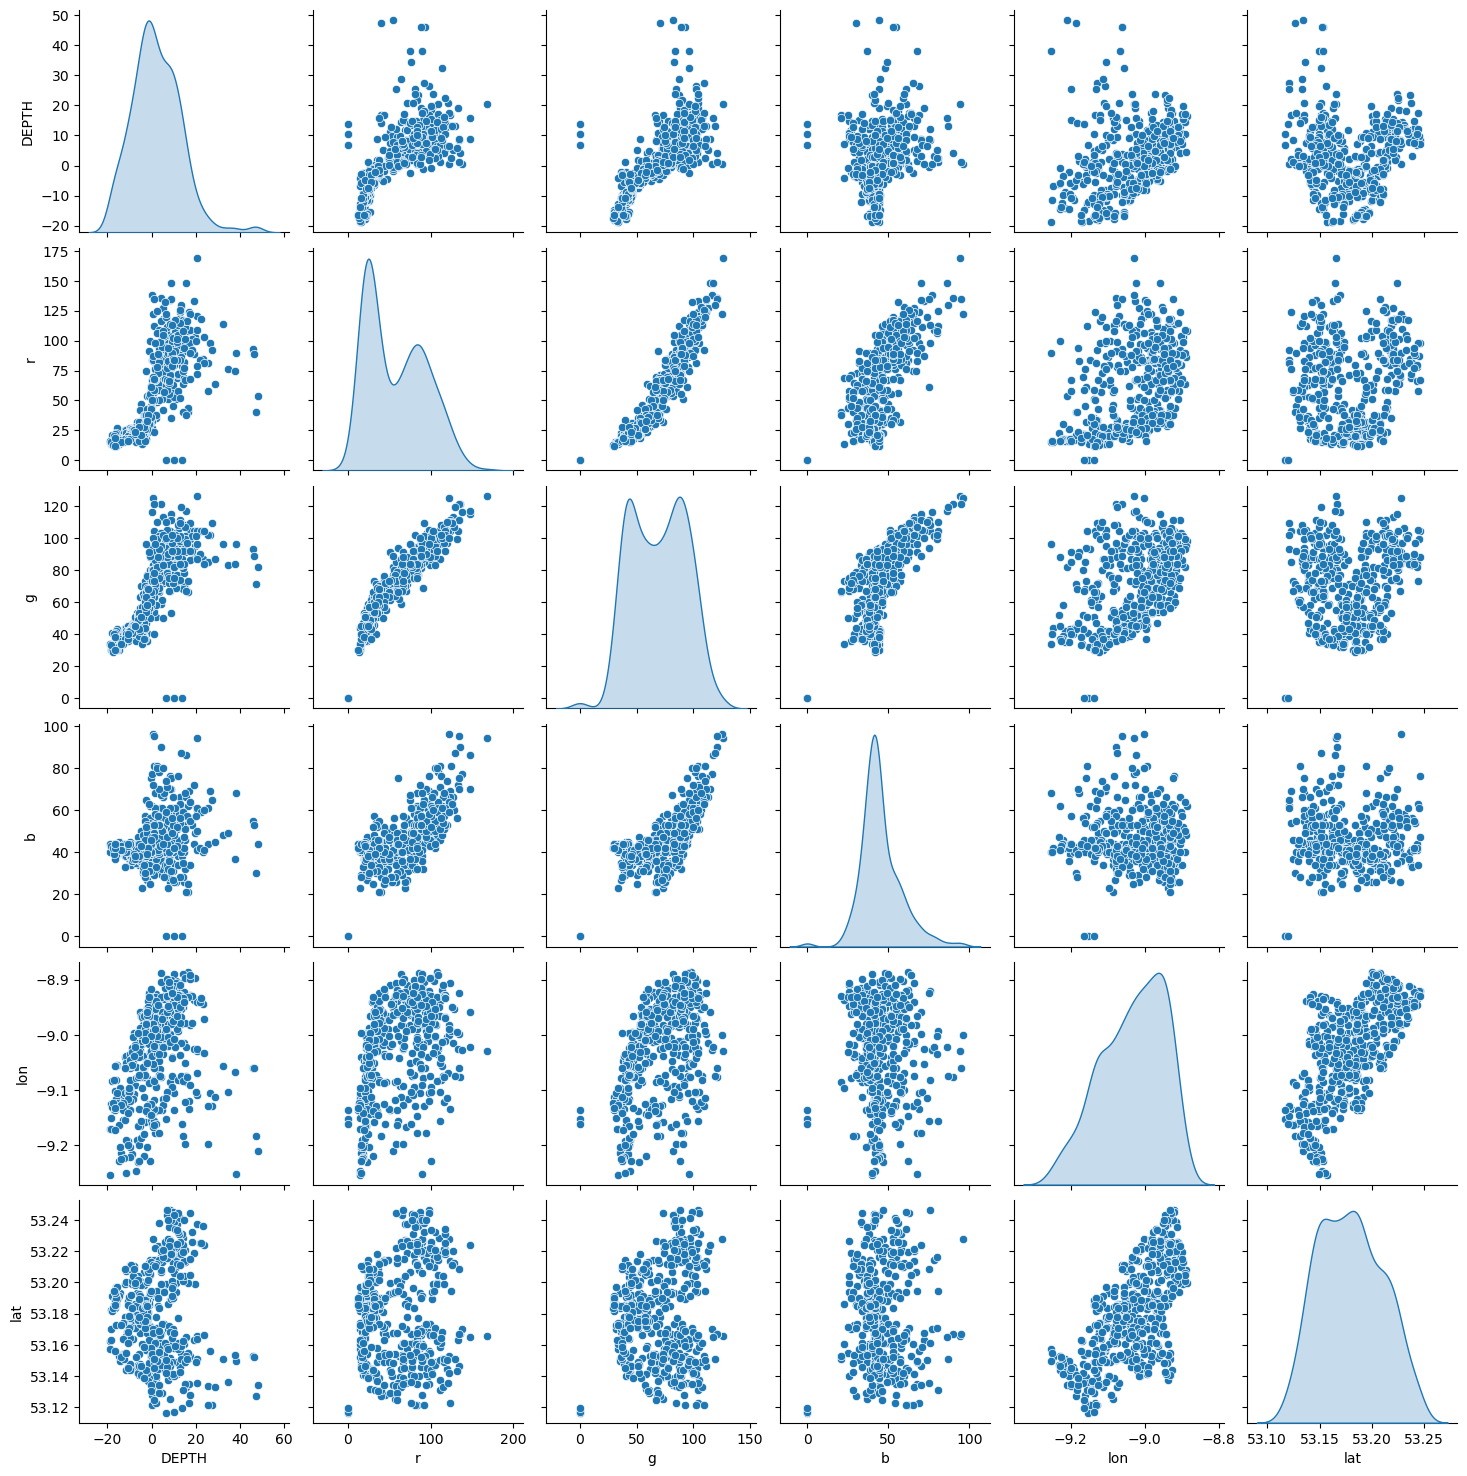

In [17]:
sns.pairplot(df_view[['DEPTH', 'r', 'g', 'b','lon','lat']], diag_kind='kde')

In [18]:
df_train_feat=df_train.copy()
df_test_feat=df_test.copy()

df_train_value=df_train_feat.pop('DEPTH')
df_test_value=df_test_feat.pop('DEPTH')
df_test_value.head()

10   -14.870
11   -18.245
13    -3.190
19   -12.090
21    42.985
Name: DEPTH, dtype: float64

In [20]:
df_train.describe().transpose()[['mean', 'std']]


mean           std
lon   -9.041848e+00  8.583047e-02
lat    5.317643e+01  3.085678e-02
DEPTH  1.589888e+00  1.097061e+01
r      5.597290e+01  3.514301e+01
g      6.796254e+01  2.428496e+01
b      4.520753e+01  1.291625e+01
color  3.685683e+06  2.309022e+06

In [21]:
 layer_norm= tf.keras.layers.Normalization(axis=-1)

In [22]:
layer_norm.adapt(np.array(df_train))

In [23]:
print(layer_norm.mean.numpy())

[[     -9.042      53.176       1.59       55.973      67.963      45.208
  3685679.   ]]


In [ ]:
first = np.array(df_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', layer_norm(first).numpy())